# Intoduccion

PreViaje es un programa de preventa turística que  reintegra el 50% del valor de los pasajes en una tarjeta de debito,Tiene como objetivo fomentar el turismo dentro del pais 

Datos de la Subsecretaría de Promoción Turística y Nuevos Productos del Ministerio de Turismo y Deportes.A partir de registros administrativos de carga de comprobantes y gasto del crédito del programa.

Incluye información de cantidad de prestadores inscriptos, viajes realizados, beneficiarios, comprobantes cargados y consumos para cada edición.

# Objetivos 

Realizar un dashboard resumiendo la evolucion del programa durante sus tres ediciones

Mostrar los destinos turisticos mas elegidos

Describir el rango de edad y genero de las personas que mas utilizaron el programa 

# Analisis

## Importar librerias

In [148]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

##Descripcion del dataset 

comprobantes_fecha.csv

    Comprobantes y monto por CLAE a 6 dígitos y fecha de carga
    
    Cantidad de comprobantes y monto total en pesos por CLAE a 6 dígitos y fecha de carga


gasto_credito.csv
    
    Consumo del crédito según operaciones y monto por día

    Cantidad de operaciones y monto en pesos de los consumos realizados por gasto del crédito por día

personas_beneficiarias.csv
   
    Personas beneficiarias por provincia de residencia, grupos de edad y género

    Cantidad de personas beneficiarias del programa por provincia de residencia, grupo de edad y género


prestadores_clae.csv
   
    Prestadores inscriptos por CLAE

    Cantidad de prestadores inscriptos al programa y cantidad de establecimientos (para PV2 y PV3), por CLAE a 6 dígitos


viajes_origen_destino_mes.csv

    Viajes y viajeros por mes de inicio, provincia de origen y destino

    Cantidad de viajes y viajeros por mes de inicio del viaje, provincia de origen y destino


## Importar los archivos  

In [6]:
comprobantes=pd.read_csv('E:\Ordenado\DATA ANALISYS\Data argentina\previaje\comprobantes_fecha.csv')

In [7]:
gasto_credito=pd.read_csv('E:\Ordenado\DATA ANALISYS\Data argentina\previaje\gasto_credito.csv')

In [8]:
personas_beneficiarias=pd.read_csv('E:\Ordenado\DATA ANALISYS\Data argentina\previaje\personas_beneficiarias.csv')

In [9]:
prestadores_clae=pd.read_csv('E:\Ordenado\DATA ANALISYS\Data argentina\previaje\prestadores_clae.csv')

In [12]:
viajes_origen_destino_mes=pd.read_csv('E:\Ordenado\DATA ANALISYS\Data argentina\previaje\\viajes_origen_destino_mes.csv')

# Data Cleaning 

### comprobantes

In [23]:
comprobantes.head()

,fecha_carga,comprobantes,monto,clae,clae6_desc,edicion,clae2,clae2_desc,clae3,clae3_desc,letra,letra_desc
0,2020-10-08,130,3652753.17,511000,Servicio de transporte aéreo de pasajeros,previaje 1,51,Transporte aéreo,511,Servicio de transporte aéreo de pasajeros,H,SERVICIO DE TRANSPORTE Y ALMACENAMIENTO
1,2020-10-08,35,1627464.98,791100,Servicios minoristas de agencias de viajes,previaje 1,79,"Agencias de viajes, servicios de reservas y ac...",791,Servicios de agencias de viaje y otras activid...,N,ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS DE APOYO
2,2020-10-09,222,5757986.58,511000,Servicio de transporte aéreo de pasajeros,previaje 1,51,Transporte aéreo,511,Servicio de transporte aéreo de pasajeros,H,SERVICIO DE TRANSPORTE Y ALMACENAMIENTO
3,2020-10-09,3,121289.00,551022,"Servicios de alojamiento en hoteles, hosterías...",previaje 1,55,Servicios de alojamiento,551,"Servicios de alojamiento, excepto en camping",I,SERVICIOS DE ALOJAMIENTO Y SERVICIOS DE COMIDA
4,2020-10-09,4,186166.50,551023,"Servicios de alojamiento en hoteles, hosterías...",previaje 1,55,Servicios de alojamiento,551,"Servicios de alojamiento, excepto en camping",I,SERVICIOS DE ALOJAMIENTO Y SERVICIOS DE COMIDA


In [22]:
comprobantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha_carga   4359 non-null   object 
 1   comprobantes  4359 non-null   int64  
 2   monto         4359 non-null   float64
 3   clae          4359 non-null   int64  
 4   clae6_desc    4359 non-null   object 
 5   edicion       4359 non-null   object 
 6   clae2         4359 non-null   int64  
 7   clae2_desc    4359 non-null   object 
 8   clae3         4359 non-null   int64  
 9   clae3_desc    4359 non-null   object 
 10  letra         4359 non-null   object 
 11  letra_desc    4359 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 408.8+ KB


In [36]:
if comprobantes.columns.isin(['fecha_carga']).any(): #check si la columna exixste

    # cambiar dtype a fecha :
    comprobantes['fecha']=pd.to_datetime(comprobantes['fecha_carga'],format="%Y/%m/%d")

    #drop fecha_carga column:
    comprobantes.drop(columns='fecha_carga',inplace=True)

comprobantes.head()

,comprobantes,monto,clae,clae6_desc,edicion,clae2,clae2_desc,clae3,clae3_desc,letra,letra_desc,fecha
0,130,3652753.17,511000,Servicio de transporte aéreo de pasajeros,previaje 1,51,Transporte aéreo,511,Servicio de transporte aéreo de pasajeros,H,SERVICIO DE TRANSPORTE Y ALMACENAMIENTO,2020-10-08
1,35,1627464.98,791100,Servicios minoristas de agencias de viajes,previaje 1,79,"Agencias de viajes, servicios de reservas y ac...",791,Servicios de agencias de viaje y otras activid...,N,ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS DE APOYO,2020-10-08
2,222,5757986.58,511000,Servicio de transporte aéreo de pasajeros,previaje 1,51,Transporte aéreo,511,Servicio de transporte aéreo de pasajeros,H,SERVICIO DE TRANSPORTE Y ALMACENAMIENTO,2020-10-09
3,3,121289.00,551022,"Servicios de alojamiento en hoteles, hosterías...",previaje 1,55,Servicios de alojamiento,551,"Servicios de alojamiento, excepto en camping",I,SERVICIOS DE ALOJAMIENTO Y SERVICIOS DE COMIDA,2020-10-09
4,4,186166.50,551023,"Servicios de alojamiento en hoteles, hosterías...",previaje 1,55,Servicios de alojamiento,551,"Servicios de alojamiento, excepto en camping",I,SERVICIOS DE ALOJAMIENTO Y SERVICIOS DE COMIDA,2020-10-09


In [37]:
comprobantes.nunique()

comprobantes    1193
monto           4339
clae              46
clae6_desc        46
edicion            3
clae2             17
clae2_desc        17
clae3             23
clae3_desc        23
letra             10
letra_desc        10
fecha            215
dtype: int64

-No hay valores nulos 

-No hay errores de tipeo, o categorias que significan lo mismo escritas de manera diferente.


### gasto_credito.

In [42]:
# cambiar dtype a fecha :
gasto_credito['fecha']=pd.to_datetime(gasto_credito['fecha'],format="%Y/%m/%d")


In [43]:
gasto_credito.head()

,fecha,operaciones,monto
0,2021-01-01,1145,5233079.98
1,2021-01-02,2954,12113625.61
2,2021-01-03,4073,13373969.04
3,2021-01-04,5102,18387131.28
4,2021-01-05,7666,23800932.74


### personas_beneficiarias

In [45]:
personas_beneficiarias.head()

,provincia,tramo_edad,genero,personas_beneficiarias,edicion
0,Chaco,18 a 29,Femenino,215,previaje 1
1,Chaco,30 a 44 años,Femenino,478,previaje 1
2,Chaco,45 a 59 años,Femenino,238,previaje 1
3,Chaco,60 años y más,Femenino,103,previaje 1
4,Chaco,18 a 29,Masculino,179,previaje 1


In [46]:
personas_beneficiarias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   provincia               595 non-null    object
 1   tramo_edad              595 non-null    object
 2   genero                  595 non-null    object
 3   personas_beneficiarias  595 non-null    int64 
 4   edicion                 595 non-null    object
dtypes: int64(1), object(4)
memory usage: 23.4+ KB


In [49]:
personas_beneficiarias.nunique()

provincia                  24
tramo_edad                  4
genero                      3
personas_beneficiarias    501
edicion                     3
dtype: int64

In [55]:
print(personas_beneficiarias['genero'].unique())
print(personas_beneficiarias['tramo_edad'].unique())


['Femenino' 'Masculino' 'X']
['18 a 29' '30 a 44 años' '45 a 59 años' '60 años y más']


### Prestadores CLAE

In [56]:
prestadores_clae.head()

,clae,prestadores,edicion,establecimientos,clae6_desc,clae3,clae3_desc,clae2,clae2_desc,letra,letra_desc
0,103012,9,previaje 1,s/d,"Elaboración y envasado de dulces, mermeladas y...",103,"Preparación de frutas, hortalizas y legumbres",10,Elaboración de productos alimenticios,C,INDUSTRIA MANUFACTURERA
1,105030,5,previaje 1,s/d,Elaboración industrial de helados,105,Elaboración de productos lácteos,10,Elaboración de productos alimenticios,C,INDUSTRIA MANUFACTURERA
2,107129,29,previaje 1,s/d,Elaboración de productos de panadería n.c.p. (...,107,Elaboración de productos alimenticios ncp,10,Elaboración de productos alimenticios,C,INDUSTRIA MANUFACTURERA
3,107301,34,previaje 1,s/d,Elaboración de cacao y chocolate,107,Elaboración de productos alimenticios ncp,10,Elaboración de productos alimenticios,C,INDUSTRIA MANUFACTURERA
4,107309,17,previaje 1,s/d,Elaboración de productos de confitería n.c.p. ...,107,Elaboración de productos alimenticios ncp,10,Elaboración de productos alimenticios,C,INDUSTRIA MANUFACTURERA


In [57]:
prestadores_clae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   clae              123 non-null    int64 
 1   prestadores       123 non-null    int64 
 2   edicion           123 non-null    object
 3   establecimientos  123 non-null    object
 4   clae6_desc        123 non-null    object
 5   clae3             123 non-null    int64 
 6   clae3_desc        123 non-null    object
 7   clae2             123 non-null    int64 
 8   clae2_desc        123 non-null    object
 9   letra             123 non-null    object
 10  letra_desc        123 non-null    object
dtypes: int64(4), object(7)
memory usage: 10.7+ KB


In [58]:
prestadores_clae.nunique()

clae                65
prestadores         72
edicion              3
establecimientos    49
clae6_desc          65
clae3               31
clae3_desc          31
clae2               21
clae2_desc          21
letra               10
letra_desc          10
dtype: int64

### viajes_origen_destino_mes

In [62]:

# cambiar dtype a mes_inicio :
viajes_origen_destino_mes['mes_inicio']=pd.to_datetime(viajes_origen_destino_mes['mes_inicio'],format="%Y/%m/%d")
viajes_origen_destino_mes.head()

,mes_inicio,provincia_origen,provincia_destino,viajes,viajeros,edicion
0,2021-01-01,Buenos Aires,Buenos Aires,6920,22436,previaje 1
1,2021-01-01,Buenos Aires,Catamarca,24,56,previaje 1
2,2021-01-01,Buenos Aires,Chaco,15,27,previaje 1
3,2021-01-01,Buenos Aires,Chubut,446,1203,previaje 1
4,2021-01-01,Buenos Aires,Ciudad Autónoma de Buenos Aires,112,272,previaje 1


In [63]:
viajes_origen_destino_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7710 entries, 0 to 7709
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   mes_inicio         7710 non-null   datetime64[ns]
 1   provincia_origen   7710 non-null   object        
 2   provincia_destino  7710 non-null   object        
 3   viajes             7710 non-null   int64         
 4   viajeros           7710 non-null   int64         
 5   edicion            7710 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 361.5+ KB


In [64]:
viajes_origen_destino_mes.nunique()

mes_inicio             24
provincia_origen       24
provincia_destino      24
viajes               1046
viajeros             1515
edicion                 3
dtype: int64

# Data Manipulation 

## comprobantes y gasto_credito 

### monto por mes 

In [82]:
#Tabla pivot usando pd.grouper para agrupar mensualmente en la columna FECHA
monto_comprobantes_mes=pd.pivot_table(comprobantes,
                                      index=(pd.Grouper(key='fecha',freq='M')),
                                      values='monto',
                                      aggfunc='sum')
monto_comprobantes_mes['monto_millones']=round((monto_comprobantes_mes['monto']/1000000),2)


In [83]:
#Tabla pivot usando pd.grouper para agrupar mensualmente en la columna FECHA
gasto_credito_mes=pd.pivot_table(gasto_credito,
                                      index=(pd.Grouper(key='fecha',freq='M')),
                                      values='monto',
                                      aggfunc='sum')
gasto_credito_mes['monto_millones']=round((gasto_credito_mes['monto']/1000000),2)


In [107]:
#Monto Combrobantes vs Gastado 
monto_comprobante_vs_gasto_mes=pd.concat([monto_comprobantes_mes['monto_millones'],
                                            gasto_credito_mes['monto_millones']],
                                           axis=1,
                                          keys=['monto_comprobantes_millones',
                                                'monto_gasto_millones'])


### plot montos por mes 

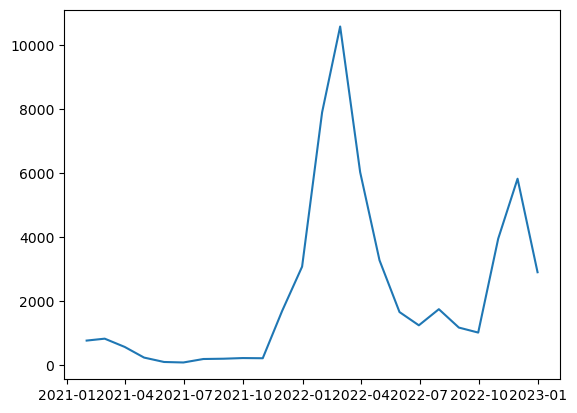

In [193]:
plt.plot('monto_millones',data=gasto_credito_mes)

### Monto Total

In [121]:
monto_comprobante_vs_gasto_total=monto_comprobante_vs_gasto_mes.sum()

In [269]:
comprobantes_tot=monto_comprobante_vs_gasto_total[0]
credito_utilizable_aprox=(comprobantes_tot/2)
gasto_tot=monto_comprobante_vs_gasto_total[1]
porc=(gasto_tot/credito_utilizable_aprox)*100
resto=credito_utilizable_aprox-gasto_tot
personas_tot=personas_beneficiarias['personas_beneficiarias'].sum()
resto_prom=(resto*1000000)/personas_tot

print(
f"Monto de comprobantes emitidos (en millones): {comprobantes_tot}\n\
credito utilizable(en millones):{credito_utilizable_aprox}\n\
Gasto del credito en las tarjetas (en millones):{gasto_tot}\n\
Porcentaje del credito disponible utilizado:{round(porc,2)}\n\
Dinero no utilizado(en millones):{round(resto,2)}\n\
Personas beneficiadas: {personas_tot}\n\
Dinero no utilizado por personas(promedio): {round(resto_prom,2)}")


Monto de comprobantes emitidos (en millones): 134668.98
credito utilizable(en millones):67334.49
Gasto del credito en las tarjetas (en millones):55550.62
Porcentaje del credito disponible utilizado:82.5
Dinero no utilizado(en millones):11783.87
Personas beneficiadas: 1879946
Dinero no utilizado por personas(promedio): 6268.2


### Monto por Edicion 

<AxesSubplot:xlabel='edicion'>

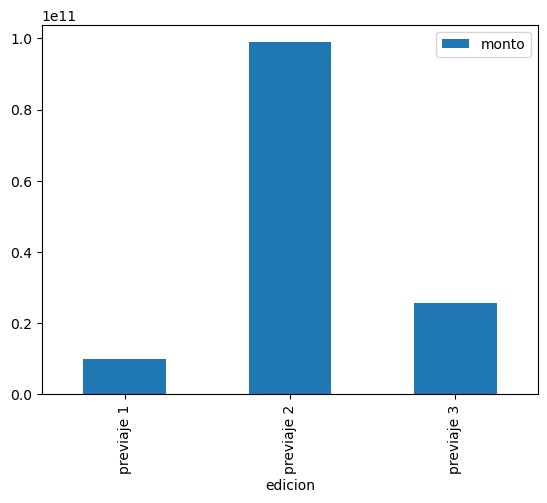

In [162]:
monto_comprobantes_por_edicion=comprobantes[['monto','edicion']].groupby('edicion').sum()
monto_comprobantes_por_edicion.plot(kind='bar')

### Monto por tipo de servicio 

<AxesSubplot:ylabel='clae2_desc'>

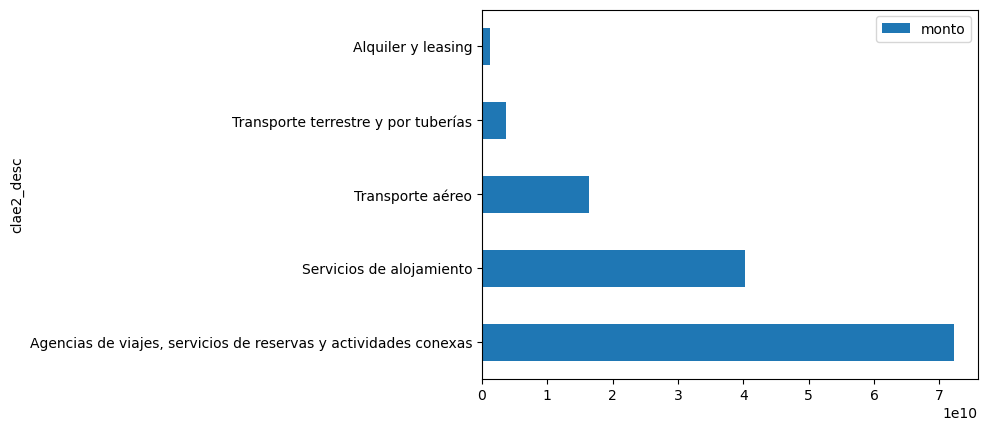

In [177]:
monto_comprobantes_por_servicio=comprobantes[['monto','clae2_desc']].groupby('clae2_desc').sum()
monto_comprobantes_por_servicio.sort_values('monto',ascending=False).head().plot(kind='barh',)

## personas_beneficiarias

In [194]:
personas_beneficiarias

,provincia,tramo_edad,genero,personas_beneficiarias,edicion
0,Chaco,18 a 29,Femenino,215,previaje 1
1,Chaco,30 a 44 años,Femenino,478,previaje 1
2,Chaco,45 a 59 años,Femenino,238,previaje 1
3,Chaco,60 años y más,Femenino,103,previaje 1
4,Chaco,18 a 29,Masculino,179,previaje 1
...,...,...,...,...,...
590,Tucumán,18 a 29,Masculino,941,previaje 3
591,Tucumán,30 a 44 años,Masculino,1658,previaje 3
592,Tucumán,45 a 59 años,Masculino,923,previaje 3
593,Tucumán,60 años y más,Masculino,650,previaje 3


### Beneficiarios por Edad

In [197]:
ben_por_edad=personas_beneficiarias.pivot_table(index='tramo_edad',
                                               values='personas_beneficiarias')

<AxesSubplot:xlabel='tramo_edad'>

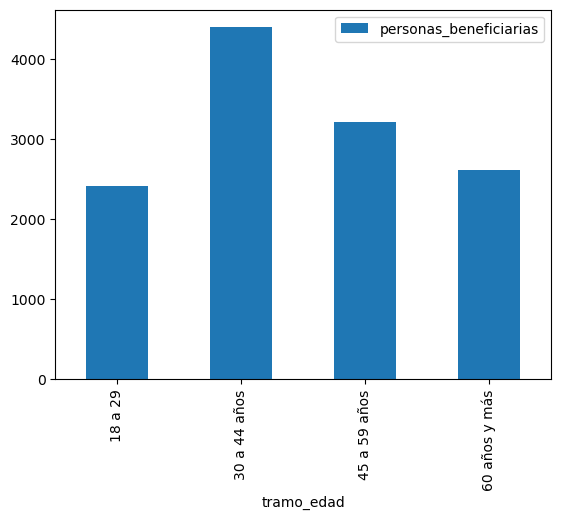

In [199]:
ben_por_edad.plot(kind='bar')

### Beneficiarios por Genero

In [200]:
ben_por_genero=personas_beneficiarias.pivot_table(index='genero',
                                               values='personas_beneficiarias')

<AxesSubplot:xlabel='genero'>

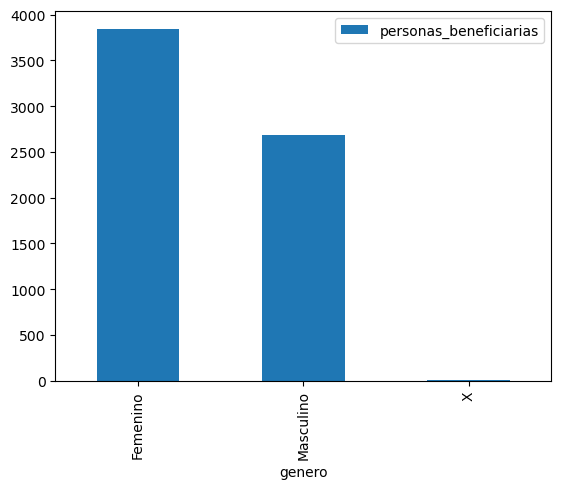

In [201]:
ben_por_genero.plot(kind='bar')

### Beneficiarios por edicion 

In [202]:
ben_por_edicion=personas_beneficiarias.pivot_table(index='edicion',
                                               values='personas_beneficiarias')

<AxesSubplot:xlabel='edicion'>

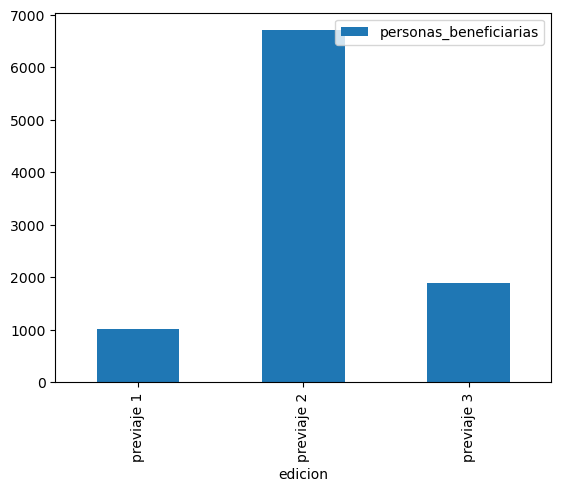

In [203]:
ben_por_edicion.plot(kind='bar')

### Beneficiarios por provincia

In [217]:
ben_por_provincia=personas_beneficiarias.pivot_table(index='provincia',
                                               values='personas_beneficiarias')\
                                        .sort_values('personas_beneficiarias',ascending=False)\
                                        .head()

<AxesSubplot:xlabel='provincia'>

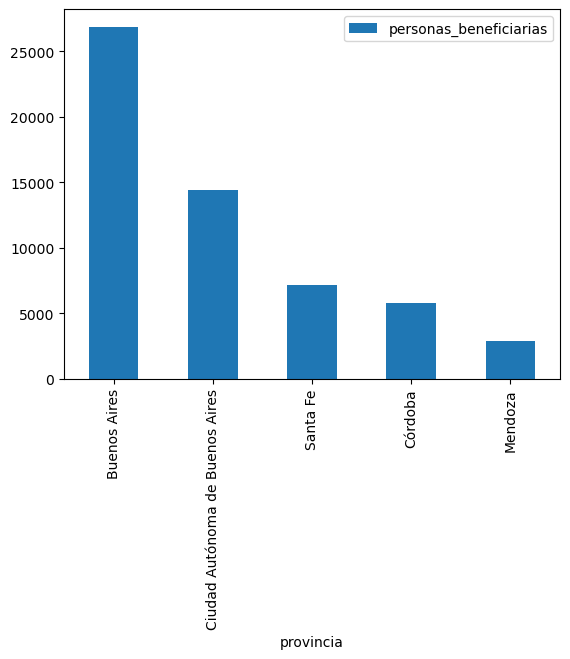

In [218]:
ben_por_provincia.plot(kind='bar')

## Prestadores CLAE

In [220]:
prestadores_clae.head()

,clae,prestadores,edicion,establecimientos,clae6_desc,clae3,clae3_desc,clae2,clae2_desc,letra,letra_desc
0,103012,9,previaje 1,s/d,"Elaboración y envasado de dulces, mermeladas y...",103,"Preparación de frutas, hortalizas y legumbres",10,Elaboración de productos alimenticios,C,INDUSTRIA MANUFACTURERA
1,105030,5,previaje 1,s/d,Elaboración industrial de helados,105,Elaboración de productos lácteos,10,Elaboración de productos alimenticios,C,INDUSTRIA MANUFACTURERA
2,107129,29,previaje 1,s/d,Elaboración de productos de panadería n.c.p. (...,107,Elaboración de productos alimenticios ncp,10,Elaboración de productos alimenticios,C,INDUSTRIA MANUFACTURERA
3,107301,34,previaje 1,s/d,Elaboración de cacao y chocolate,107,Elaboración de productos alimenticios ncp,10,Elaboración de productos alimenticios,C,INDUSTRIA MANUFACTURERA
4,107309,17,previaje 1,s/d,Elaboración de productos de confitería n.c.p. ...,107,Elaboración de productos alimenticios ncp,10,Elaboración de productos alimenticios,C,INDUSTRIA MANUFACTURERA


### Prestadores por Categoria 

In [229]:
prestadores_por_cat=prestadores_clae[['prestadores','clae3_desc']].groupby('clae3_desc')\
                                                                    .sum()\
                                                                    .sort_values('prestadores',ascending=False)

In [230]:
prestadores_por_cat.head()

,prestadores
clae3_desc,
"Servicios de alojamiento, excepto en camping",20795
Servicios de agencias de viaje y otras actividades complementarias de apoyo turístico,12659
Servicio de transporte automotor,1372
Servicios de expendio de comidas y bebidas,1126
Alquiler de vehículos automotores y equipo de transporte sin conductor ni operarios,851


### Prestadores por Edicion 

In [232]:
prestadores_por_ed=prestadores_clae[['prestadores','edicion']].groupby('edicion')\
                                                                    .sum()\
                                                                    .sort_values('prestadores',ascending=False)

In [235]:
prestadores_por_ed.head()

,prestadores
edicion,
previaje 2,13147
previaje 1,12932
previaje 3,12240


## viajes origen y destino 

### Destinos mas populares

In [240]:
viajes_origen_destino_mes[['provincia_destino','viajeros']].groupby('provincia_destino')\
                                                            .sum()\
                                                            .sort_values('viajeros',ascending=False)\
                                                            .head()

,viajeros
provincia_destino,
Buenos Aires,1069949
Río Negro,825770
Córdoba,487968
Mendoza,391625
Santa Cruz,385279


# Conclusiones

# Export Data y dashboard 

### Crear dataframe fechas de ediciones de los previajes

In [282]:
path=r'E:\Ordenado\DATA ANALISYS\Data argentina\previaje'

In [278]:
data={'edicion':['previaje 1','previaje 2','previaje 3'],
     'fecha_inicio_carga':['2020-10-8','2021-9-14','2022-9-6'],
     'fecha_fin_carga':['2021-1-8','2022-1-3','2022-9-15'],
     'fecha_inicio_viaje':['2021-1-1','2021-11-1','2022-10-10'],
     'fecha_fin_viaje':['2021-12-31','2022-12-31','2022-12-5']}


fechas_previaje=pd.DataFrame(data)

In [279]:
fechas_previaje

,edicion,fecha_inicio_carga,fecha_fin_carga,fecha_inicio_viaje,fecha_fin_viaje
0,previaje 1,2020-10-8,2021-1-8,2021-1-1,2021-12-31
1,previaje 2,2021-9-14,2022-1-3,2021-11-1,2022-12-31
2,previaje 3,2022-9-6,2022-9-15,2022-10-10,2022-12-5


In [280]:
# change all columns to datetime format
for col in fechas_previaje.columns[1:]:
    fechas_previaje[col]=pd.to_datetime(fechas_previaje[col],format="%Y-%m-%d")
fechas_previaje

,edicion,fecha_inicio_carga,fecha_fin_carga,fecha_inicio_viaje,fecha_fin_viaje
0,previaje 1,2020-10-08,2021-01-08,2021-01-01,2021-12-31
1,previaje 2,2021-09-14,2022-01-03,2021-11-01,2022-12-31
2,previaje 3,2022-09-06,2022-09-15,2022-10-10,2022-12-05


In [283]:
# To csv 
fechas_previaje.to_csv(path+'/fechas_previaje.csv',encoding='latin1')

In [289]:
data={'edicion':['previaje 1','previaje 1','previaje 2','previaje 2','previaje 3','previaje 3'],
      'etapa':['carga','viaje','carga','viaje','carga','viaje'],
      'fecha_inicio':['2020-10-8','2021-1-1','2021-9-14','2021-11-1','2022-9-6','2022-10-10'],
      'fecha_fin':['2021-1-8','2021-12-31','2022-1-3','2022-12-31','2022-9-15','2022-12-5']}

fechas_previaje=pd.DataFrame(data)

In [290]:
fechas_previaje

,edicion,etapa,fecha_inicio,fecha_fin
0,previaje 1,carga,2020-10-8,2021-1-8
1,previaje 1,viaje,2021-1-1,2021-12-31
2,previaje 2,carga,2021-9-14,2022-1-3
3,previaje 2,viaje,2021-11-1,2022-12-31
4,previaje 3,carga,2022-9-6,2022-9-15
5,previaje 3,viaje,2022-10-10,2022-12-5


In [291]:
# change all columns to datetime format
for col in fechas_previaje.columns[2:]:
    fechas_previaje[col]=pd.to_datetime(fechas_previaje[col],format="%Y-%m-%d")
fechas_previaje

,edicion,etapa,fecha_inicio,fecha_fin
0,previaje 1,carga,2020-10-08,2021-01-08
1,previaje 1,viaje,2021-01-01,2021-12-31
2,previaje 2,carga,2021-09-14,2022-01-03
3,previaje 2,viaje,2021-11-01,2022-12-31
4,previaje 3,carga,2022-09-06,2022-09-15
5,previaje 3,viaje,2022-10-10,2022-12-05


In [292]:
# To csv 
fechas_previaje.to_csv(path+'/fechas_previaje.csv',encoding='latin1')